In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("listeners.csv")
df2 = pd.read_csv("train.csv")



In [22]:

# Set higher DPI for better resolution
plt.rcParams['figure.dpi'] = 150  # You can adjust the value (e.g., 150, 200, etc.)


### About the data

artists: The name(s) of the artist(s) associated with the track. (String)

album_name: The name of the album that the track belongs to. (String)

track_name: The name of the track. (String)

popularity: The popularity score of the track on Spotify, ranging from 0 to 100. (Integer)

duration_ms: The duration of the track in milliseconds. (Integer)

explicit: A boolean value indicating whether the track contains explicit content. (Boolean)

danceability: A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements.(Float)

energy: A measure of the intensity and activity of a track, ranging from 0 to 1. (Float)

key: The key of the track represented by an integer value. (Integer)

loudness: The loudness of the track in decibels (dB). (Float)

mode: The tonal mode of the track, represented by an integer value (0 for minor, 1 for major). (Integer)

speechiness: A score ranging from 0 to 1 that represents the presence of spoken words in a track. (Float)

acousticness: A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality. (Float)

instrumentalness: A score ranging from 0 to 1 that represents the likelihood of a track being instrumental. (Float)

liveness: A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance of atrack. (Float)

valence: A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track. (Float)

tempo: The tempo of the track in beats per minute (BPM). (Float)

time_signature: The number of beats within each bar of the track. (Integer)

track_genre: The genre of the track. (String)


## Questions:

1. What genres of music do the most popular artists typically produce?
2. Is there a correlation between "danceability" and popularity?
3. Similarly, how does song duration correlate with popularity?
4. Print the most consistently listened to albums
5. Conversely, print albums with "one hit wonders", where only one or few songs are popular
6. Identify "one-hit wonders" by looking at songs whose popularity is very different from the artist's mean popularity

In [23]:
df2 = df2[df2["artists"].apply(lambda x: isinstance(x, str))]
df2["artists"] = df2["artists"].apply(lambda x: x.split(";"))

In [13]:
# Group rows by artist and explode the "artists" column
grouped_df = df2.explode("artists").groupby("artists")

# Find the top 5 most popular artists
top_artists = grouped_df.size().reset_index(name='count').sort_values(by="count", ascending=False).head(5)

# Get the genres produced by the top 5 artists
top_genres = {artist: grouped_df.get_group(artist)["track_genre"].value_counts() for artist in top_artists["artists"]}

# Print the genres for each top artist
for artist, genres in top_genres.items():
    print(f"{artist}:\n{genres}\n")

J Balvin:
track_genre
reggaeton     127
latino        126
reggae        113
latin         101
dance           8
electronic      8
edm             7
electro         7
pop             5
dancehall       3
funk            3
hip-hop         1
pagode          1
Name: count, dtype: int64

Bad Bunny:
track_genre
latino       121
reggaeton    114
reggae        90
latin         73
hip-hop       15
dance          2
salsa          1
Name: count, dtype: int64

Daddy Yankee:
track_genre
latino               87
reggaeton            80
reggae               72
latin                69
hip-hop              53
progressive-house     3
electro               3
dancehall             2
j-dance               2
hardcore              1
edm                   1
house                 1
pop                   1
Name: count, dtype: int64

Wolfgang Amadeus Mozart:
track_genre
classical    354
Name: count, dtype: int64

Feid:
track_genre
latino       79
reggaeton    75
reggae       71
latin        69
pop          54
Name

Question 3

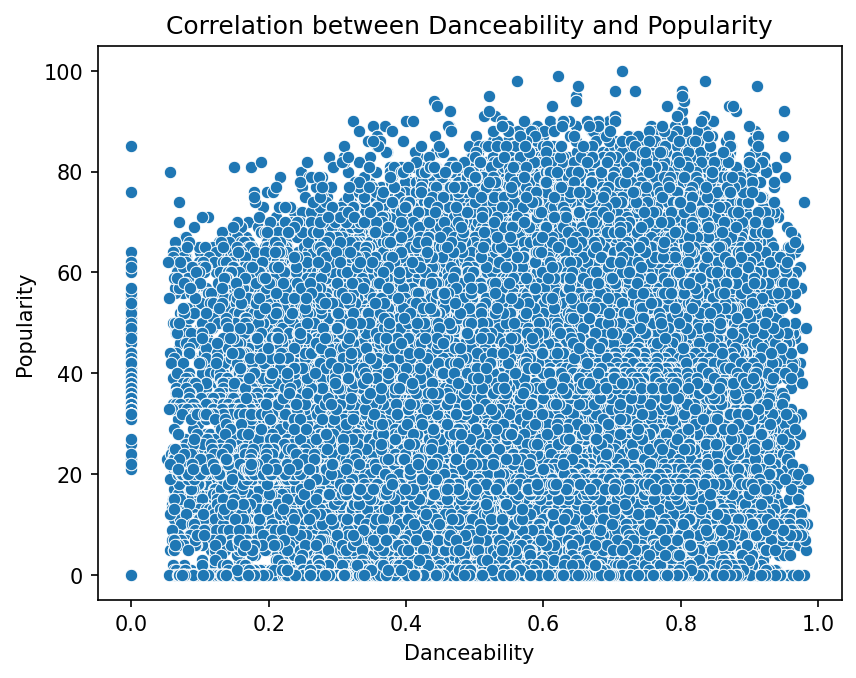

Correlation between danceability and popularity: 0.03544354596134703


In [14]:
# Scatter plot to visualize the correlation
sns.scatterplot(data=df2, x="danceability", y="popularity")
plt.title("Correlation between Danceability and Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

# Calculate the correlation coefficient
correlation = df2["danceability"].corr(df2["popularity"])
print(f"Correlation between danceability and popularity: {correlation}")

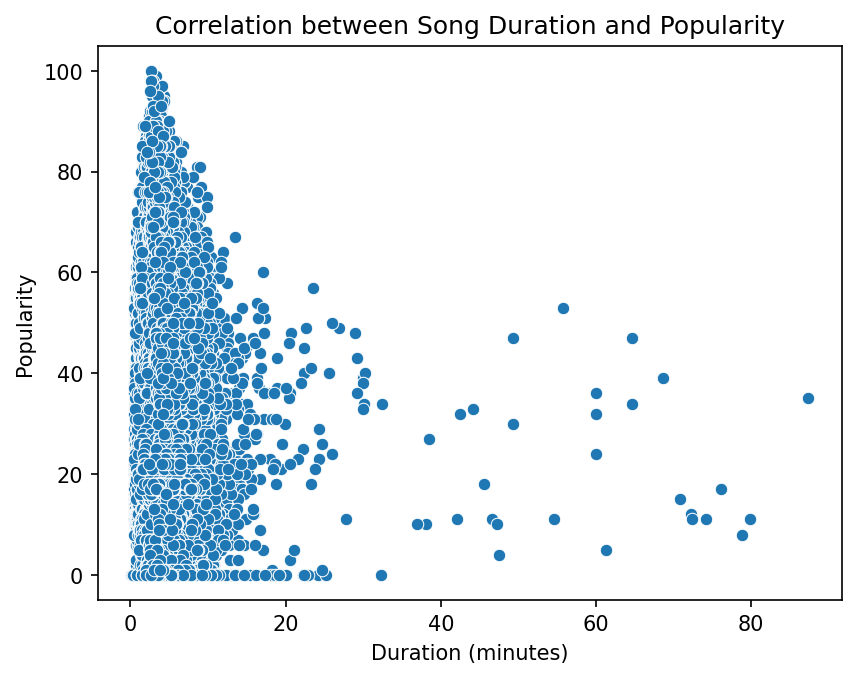

Correlation between song duration and popularity: -0.007129199829767922


In [26]:

# Convert duration from milliseconds to minutes for better readability
df2["duration_minutes"] = df2["duration_ms"] / 60000

# Scatter plot to visualize the correlation
sns.scatterplot(data=df2, x="duration_minutes", y="popularity")
plt.title("Correlation between Song Duration and Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()

# Calculate the correlation coefficient
correlation = df2["duration_ms"].corr(df2["popularity"])
print(f"Correlation between song duration and popularity: {correlation}")

In [17]:
# Group by album and calculate the mean and standard deviation of popularity
album_stats = df2.groupby("album_name")["popularity"].agg(["mean", "std"]).reset_index()

# Sort by the lowest standard deviation (most consistent)
consistent_albums = album_stats.sort_values(by="std", ascending=False).head(5)
print("Most consistently listened-to albums:")
print(consistent_albums)

Most consistently listened-to albums:
          album_name  mean        std
14962  Glimpse of Us  58.0  50.911688
5862           Bones  59.0  42.426407
8249   Confrontation  42.5  41.719300
24187     Millennium  51.5  41.719300
27870       Overdose  48.5  41.719300


In [ ]:


# Group rows by artist
grouped_df2 = df2.explode("artists").groupby("artists")
# Group by artist and calculate the mean popularity
artist_popularity = grouped_df2["popularity"].mean().reset_index()
artist_popularity.columns = ["artists", "mean_popularity"]

# Merge the mean popularity back into the original DataFrame
merged_df2 = df2.explode("artists").merge(artist_popularity, on="artists")

# Calculate the difference between song popularity and artist's mean popularity
merged_df2["popularity_diff"] = abs(merged_df2["popularity"] - merged_df2["mean_popularity"])

# Filter songs with a large difference (e.g., > 20)
one_hit_wonders = merged_df2[merged_df2["popularity_diff"] > 20]

print("One-hit wonders:")
print(one_hit_wonders[["track_name", "artists", "popularity", "mean_popularity", "popularity_diff"]].sort_values(by="popularity_diff", ascending=False))

One-hit wonders:
                                          track_name             artists  \
5                                            Hold On    Chord Overstreet   
8                                      Say Something  Christina Aguilera   
9                                          I'm Yours          Jason Mraz   
10                                             Lucky          Jason Mraz   
14                                   I Won't Give Up          Jason Mraz   
...                                              ...                 ...   
158133                                     One Thing          Housefires   
158158      Simple Kingdom (with Cody Carnes) - Live         Cody Carnes   
158168                                     Psalm 145       Shane & Shane   
158199  Good To Be Loved By You (with Tyler Hubbard)       Tyler Hubbard   
158276                   Fountain (I Am Good) - Live          Mosaic MSC   

        popularity  mean_popularity  popularity_diff  
5              

In [ ]:
#print(df2.tail(100))
# Count number of rows and sort in descending order
grouped_df2_count = grouped_df2.size().reset_index(name='count').sort_values(by="count", ascending=False)
# Count how many songs of different genres the top 5 artists have produced
top_5_artists = grouped_df2_count.head(5)["artists"]
top_5_genres = {artist: grouped_df2.get_group(artist)["track_genre"].value_counts() for artist in top_5_artists}
print(top_5_genres)
#the_weeknd_genres = grouped_df2.get_group("The Weeknd")["track_genre"].value_counts()

#sns.barplot(x=the_weeknd_genres.index, y=the_weeknd_genres.values)
#plt.xticks(rotation=45)

{'J Balvin': track_genre
reggaeton     127
latino        126
reggae        113
latin         101
dance           8
electronic      8
edm             7
electro         7
pop             5
dancehall       3
funk            3
hip-hop         1
pagode          1
Name: count, dtype: int64, 'Bad Bunny': track_genre
latino       121
reggaeton    114
reggae        90
latin         73
hip-hop       15
dance          2
salsa          1
Name: count, dtype: int64, 'Daddy Yankee': track_genre
latino               87
reggaeton            80
reggae               72
latin                69
hip-hop              53
progressive-house     3
electro               3
dancehall             2
j-dance               2
hardcore              1
edm                   1
house                 1
pop                   1
Name: count, dtype: int64, 'Wolfgang Amadeus Mozart': track_genre
classical    354
Name: count, dtype: int64, 'Feid': track_genre
latino       79
reggaeton    75
reggae       71
latin        69
pop      

In [14]:
#sns.barplot(data=cleaned)